In [1]:
import pandas as pd
import numpy as np
import sqlite3
conn = sqlite3.connect('zippedData/im.db')
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sns.set_palette("colorblind")
%matplotlib inline
from scipy import stats

In [2]:
# Load data into notebook

# rt.reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz')
# rt.movie_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz')
rtcurrent_df = pd.read_csv('zippedData/rotten_tomatoes_movies.csv')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
genres_df = pd.read_csv('zippedData/genres_breakdown.csv')
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
studios_df = pd.read_csv('zippedData/movie_studio_breakdown.csv')
stats_df = pd.read_csv('zippedData/rt_moviestats.csv')
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# MAKE SURE ALL CSV FILES UPLOADED TOGITHUB REPO


# Studio and Genre movie count

In [3]:
# Convert ticket to float 
# genres_df['Tickets']= genres_df['Tickets'].str.replace(',','')
# genres_df['Tickets'] = [float(x) for x in genres_df['Tickets'].values]
# genres_df = genres_df.sort_values(by='Movies', ascending = False)

Text(0.5, 1.0, 'Total Movies By Genre')

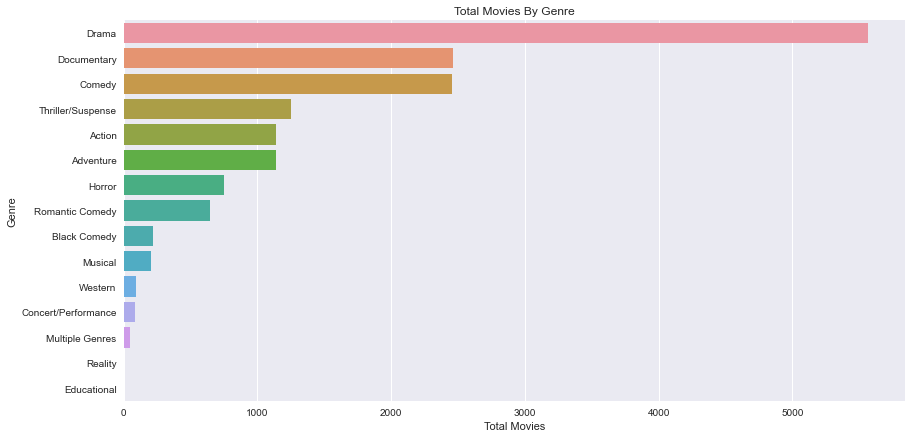

In [4]:
## REVISIT

#Movies by genre
x = genres_df['Movies']
y = genres_df['Genre']

plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=x, y=y,)
plt.xlabel('Total Movies')
plt.ylabel('Genre')
plt.title('Total Movies By Genre')

In [5]:
#Taking top 7 studios to rank market share 
studios_df['Share'] = list(map(lambda x: x[:-1], studios_df['Share'].values))
studios_df['Share'] = [float(x) for x in studios_df['Share'].values]
studios_df = studios_df.head(7)

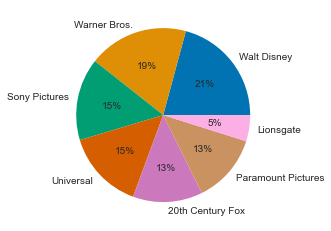

In [6]:
# Pie Chart visualizing market share by movie studio
x = studios_df['Share']
y = studios_df['Movie Studio']

plt.pie(x, labels=y, autopct='%.0f%%')

plt.show()

In [7]:
stats_df = stats_df.drop(['rating', 'year', 'score', 'votes', 'writer', 'star', 'country'], axis = 1 )
stats_df.dropna()

,name,genre,released,director,budget,gross,company,runtime
0,The Shining,Drama,"June 13, 1980 (United States)",Stanley Kubrick,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,"July 2, 1980 (United States)",Randal Kleiser,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,"June 20, 1980 (United States)",Irvin Kershner,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,"July 2, 1980 (United States)",Jim Abrahams,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,"July 25, 1980 (United States)",Harold Ramis,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,"January 17, 2020 (United States)",Adil El Arbi,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,Action,"February 14, 2020 (United States)",Jeff Fowler,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,Adventure,"January 17, 2020 (United States)",Stephen Gaghan,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,Adventure,"February 21, 2020 (United States)",Chris Sanders,135000000.0,111105497.0,20th Century Studios,100.0


In [8]:
#quantity of movies by studio ** Columbia = Sony 
stats_df['company'].value_counts().head(15)

Universal Pictures           377
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Dreamworks Pictures           76
Miramax                       74
Fox 2000 Pictures             63
Orion Pictures                60
Summit Entertainment          60
Name: company, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Animation'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Romance'),
  Text(10, 0, 'Sci-Fi'),
  Text(11, 0, 'Thriller'),
  Text(12, 0, 'Mystery')])

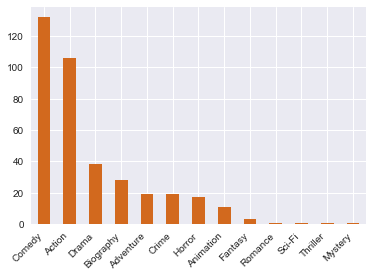

In [9]:
## REVISIT TO ADD PROPER TITLE
#Count of Universal movies by Genre
Universal_df = stats_df[stats_df['company'] == 'Universal Pictures']
Universal_df['genre'].value_counts().plot(kind='bar', stacked=True, color='chocolate')
plt.title = ('Universal Movies by Genre')
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Animation'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Sci-Fi'),
  Text(10, 0, 'Mystery')])

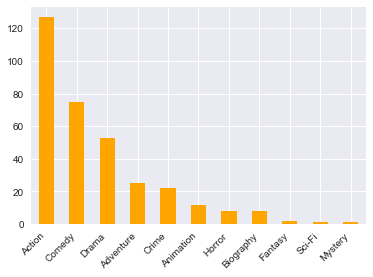

In [10]:
#Count of WB movies by Genre
WB_df = stats_df[stats_df['company'] == 'Warner Bros.']
WB_df['genre'].value_counts().plot(kind='bar', stacked=True, color='orange')
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Biography'),
  Text(5, 0, 'Animation'),
  Text(6, 0, 'Adventure'),
  Text(7, 0, 'Horror'),
  Text(8, 0, 'Mystery'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Romance')])

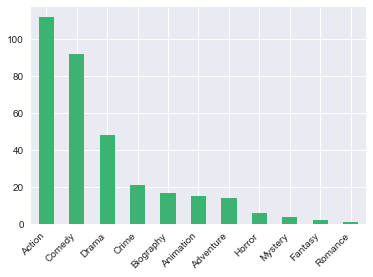

In [11]:
Sony_df = stats_df[stats_df['company'] == 'Columbia Pictures']
Sony_df['genre'].value_counts().plot(kind='bar', stacked=True, color='mediumseagreen')
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Horror'),
  Text(6, 0, 'Animation'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Mystery'),
  Text(10, 0, 'Sci-Fi'),
  Text(11, 0, 'Thriller'),
  Text(12, 0, 'Family')])

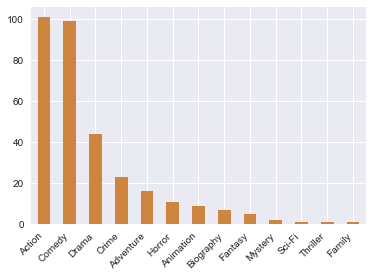

In [12]:
Paramount_df = stats_df[stats_df['company'] == 'Paramount Pictures']
Paramount_df['genre'].value_counts().plot(kind='bar', stacked=True, color='peru')
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Animation'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Family')])

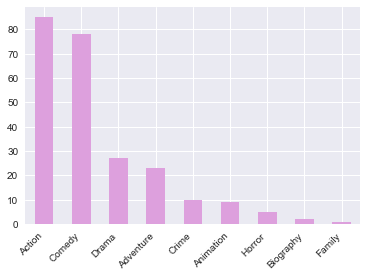

In [13]:
twentieth_df = stats_df[stats_df['company'] == 'Twentieth Century Fox']
twentieth_df['genre'].value_counts().plot(kind='bar', stacked=True, color='plum')
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Adventure'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Biography'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Family')])

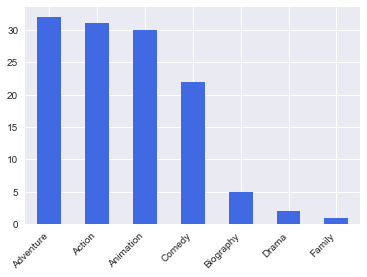

In [14]:
disney_df = stats_df[stats_df['company'] == 'Walt Disney Pictures']
disney_df['genre'].value_counts().plot(kind='bar', stacked=True, color='royalblue')
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Biography'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Animation')])

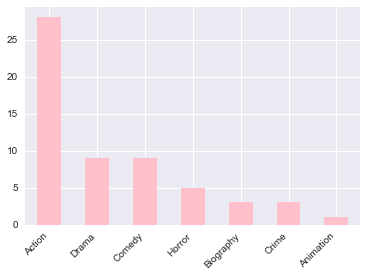

In [15]:
lionsgate_df = stats_df[stats_df['company'] == 'Lionsgate']
lionsgate_df['genre'].value_counts().plot(kind='bar', stacked=True, color='pink')
plt.xticks(rotation=45, horizontalalignment='right')

In [16]:
stats_df['profit']= stats_df['gross'] - stats_df['budget']
stats_df['ROI'] = stats_df['profit']/ stats_df['budget'] *100
stats_df['Margin'] = stats_df['profit']/stats_df['gross']*100
stats_df = stats_df[stats_df['Margin'] > 0]
stats_df = stats_df.groupby('genre').filter(lambda x: len(x) > 1)
stats_df = stats_df.sort_values (by='Margin', ascending = False)
stats_df['genre'].value_counts()

Action       1030
Comedy       1001
Drama         523
Animation     235
Crime         224
Adventure     215
Biography     201
Horror        199
Fantasy        30
Mystery        11
Thriller        8
Sci-Fi          3
Romance         2
Name: genre, dtype: int64

In [17]:
stats_df.groupby(['genre'])[['Margin']].agg('median').sort_values(by = 'Margin', ascending = False)

,Margin
genre,
Sci-Fi,83.317831
Thriller,76.921344
Horror,75.187613
Mystery,72.863482
Animation,71.429822
Drama,67.504520
Fantasy,65.421540
Comedy,64.338689
Adventure,63.968665


In [18]:
stats_df.groupby(['genre'])[['Margin']].agg('mean').sort_values(by = 'Margin', ascending = False)

,Margin
genre,
Sci-Fi,85.270267
Thriller,75.345261
Horror,70.134525
Animation,66.229038
Mystery,64.742082
Drama,62.405485
Adventure,61.075041
Fantasy,60.386715
Comedy,60.066463


Text(0, 0.5, 'Profit Margin (%)')

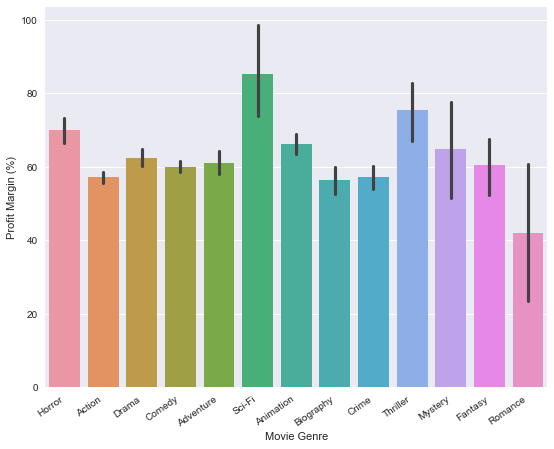

In [19]:
# Issue with title of graph

x = stats_df['genre']
y = stats_df['Margin']


plt.figure(figsize=(9,7))
sns.barplot(x = x, y = y)
plt.xticks(rotation=35, horizontalalignment='right')

# plt.title('Average Profit Margin per movie by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Profit Margin (%)')

# Genre Proof

## Buzz or Key Words

In [20]:
money_columns = ['production_budget','domestic_gross','worldwide_gross']
tn_movie_budgets[money_columns] = tn_movie_budgets[money_columns].replace([',','\$'], '', regex = True).astype(float)
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets['ROI'] = tn_movie_budgets['profit'] / tn_movie_budgets['production_budget']
tn_movie_budgets['profit_margin'] = tn_movie_budgets['profit'] / tn_movie_budgets['worldwide_gross'] * 100
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.532577,84.692106
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,1.546673,60.733080
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-0.572108,-133.703598
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,3.243841,76.436443
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,3.153696,75.925058
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-1.000000,-inf
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.344950e+05,39.082500,97.505146
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-0.732400,-273.692078
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-1.000000,-inf


In [21]:
#tn_movie_budgets = tn_movie_budgets.loc[tn_movie_budgets['profit_margin'] < 0 ,['profit_margin']] = 0 
#tn_movie_budgets.loc[tn_movie_budgets['profit_margin'] < -100 , 'profit_margin'] = -100
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.532577,84.692106
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,1.546673,60.733080
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-0.572108,-133.703598
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,3.243841,76.436443
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,3.153696,75.925058
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-1.000000,-inf
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.344950e+05,39.082500,97.505146
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-0.732400,-273.692078
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-1.000000,-inf


In [22]:
title_vs_gross = pd.DataFrame(tn_movie_budgets[['movie','ROI','profit_margin']])


title_vs_gross['movie'] = title_vs_gross['movie'].str.lower()
title_vs_gross['movie'] = title_vs_gross['movie'].replace([':','\.','\,',"'",'!'], '', regex = True)
#title_vs_gross['movie'] = title_vs_gross['movie'].str.replace(r'(\w{2,})s\b', r'\1')

#display(title_vs_gross)

cleaned_titles_success = title_vs_gross.loc[title_vs_gross['ROI'] >= 1 ]
cleaned_titles_fail = title_vs_gross.loc[title_vs_gross['ROI'] <= 0 ]


words_success = cleaned_titles_success['movie'].str.split(expand=True).stack().value_counts()
words_fail = cleaned_titles_fail['movie'].str.split(expand=True).stack().value_counts()


words_success = words_success.reset_index()
words_fail = words_fail.reset_index()


words_success = words_success.rename(columns = {0:'count','index':'word'})
words_fail = words_fail.rename(columns = {0:'count','index':'word'})


stopwords = ['the','and','of','a','to','in','2','3','on','&','with','ii','for','is','it','harry','from','part',"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]


words_success = words_success[~words_success['word'].isin(stopwords)]
words_fail = words_fail[~words_fail['word'].isin(stopwords)]


words_difference = words_success.merge(words_fail, on = 'word')

words_difference['difference'] = words_difference['count_x'] - words_difference['count_y']

display(words_difference.sort_values(by = 'difference', ascending = False).tail(50))

print(len(cleaned_titles_success))
print(len(cleaned_titles_fail))

,word,count_x,count_y,difference
472,kiss,1,3,-2
479,warriors,1,3,-2
339,stone,2,4,-2
386,lives,2,4,-2
665,sin,1,3,-2
304,steel,2,4,-2
244,san,3,5,-2
252,burn,2,4,-2
655,quest,1,3,-2
273,paris,2,4,-2


2621
2125


In [23]:
wedding_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('wedding')]
print('Median ROI for movies with "wedding" in the title:',wedding_roi['ROI'].median())
love_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('love')]
print('Median ROI for movies with "love" in the title:',love_roi['ROI'].median())

Median ROI for movies with "wedding" in the title: 2.434441657608696
Median ROI for movies with "love" in the title: 0.12843673846153847


In [24]:
seaborn_boxplot_df = pd.concat([wedding_roi,love_roi])

seaborn_boxplot_df['Word in Title'] = seaborn_boxplot_df['movie'].str.contains('wedding')
seaborn_boxplot_df.loc[seaborn_boxplot_df['Word in Title'] == True, ['Word in Title']] = 'Wedding'
seaborn_boxplot_df.loc[seaborn_boxplot_df['Word in Title'] == False, ['Word in Title']] = 'Love'

seaborn_boxplot_df

,movie,ROI,profit_margin,Word in Title
993,american wedding,1.298638,56.495986,Wedding
1243,my best friends wedding,5.498335,84.611443,Wedding
1375,wedding crashers,6.080459,85.876622,Wedding
1772,mike and dave need wedding dates,1.299942,56.520651,Wedding
1786,the big wedding,0.490030,32.887252,Wedding
...,...,...,...,...
5570,lovely and amazing,17.453928,94.581099,Love
5574,the incredibly true adventure of two girls in ...,8.908620,89.907777,Love
5578,love and other catastrophes,1.972864,66.362403,Love
5603,the love letter,-1.000000,-inf,Love


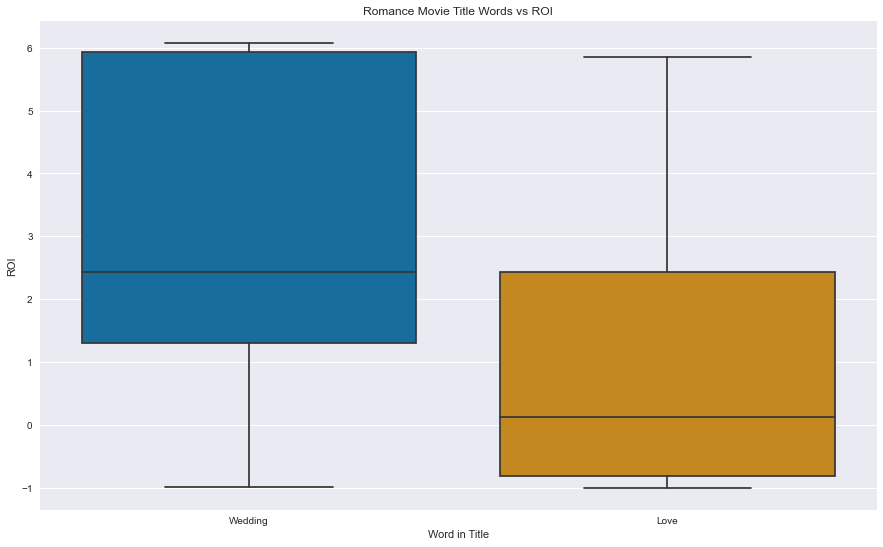

In [25]:
fig, ax = plt.subplots(figsize = (15,9))

ax = sns.boxplot(x = seaborn_boxplot_df['Word in Title'], y = seaborn_boxplot_df['ROI'], showfliers = False)
ax.set_title("Romance Movie Title Words vs ROI");

In [26]:
blood_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('blood')]
print('Median ROI for movies with "blood" in the title:',blood_roi['ROI'].median())
dead_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('dead')]
print('Median ROI for movies with "dead" in the title:',dead_roi['ROI'].median())

Median ROI for movies with "blood" in the title: -0.47600966
Median ROI for movies with "dead" in the title: -0.098728895


In [27]:
evil_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('evil')]
print('Median ROI for movies with "evil" in the title:',evil_roi['profit_margin'].median())
night_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('night')]
print('Median ROI for movies with "night" in the title:',night_roi['profit_margin'].median())

Median ROI for movies with "evil" in the title: 60.05392209207773
Median ROI for movies with "night" in the title: 57.305423148406106


In [28]:
thriller_boxplot_df = pd.concat([blood_roi,dead_roi,evil_roi,night_roi])

thriller_boxplot_df.loc[thriller_boxplot_df['movie'].str.contains('blood'),['Word in Title']] = 'blood'
thriller_boxplot_df.loc[thriller_boxplot_df['movie'].str.contains('dead'),['Word in Title']] = 'dead'
thriller_boxplot_df.loc[thriller_boxplot_df['movie'].str.contains('evil'),['Word in Title']] = 'evil'
thriller_boxplot_df.loc[thriller_boxplot_df['movie'].str.contains('night'),['Word in Title']] = 'night'

thriller_boxplot_df

,movie,ROI,profit_margin,Word in Title
19,harry potter and the half-blood prince,2.740855,73.268144,blood
388,blood diamond,0.713779,41.649425,blood
1170,blood work,-0.476010,-90.843213,blood
1328,rambo first blood part ii,5.827273,85.352863,blood
1690,underworld blood wars,1.320263,56.901446,blood
...,...,...,...,...
5561,midnight cabaret,-1.000000,-inf,night
5587,nightlights,-0.915412,-1082.200785,night
5620,the overnight,4.829980,82.847282,night
5676,night of the living dead,262.921614,99.621100,night


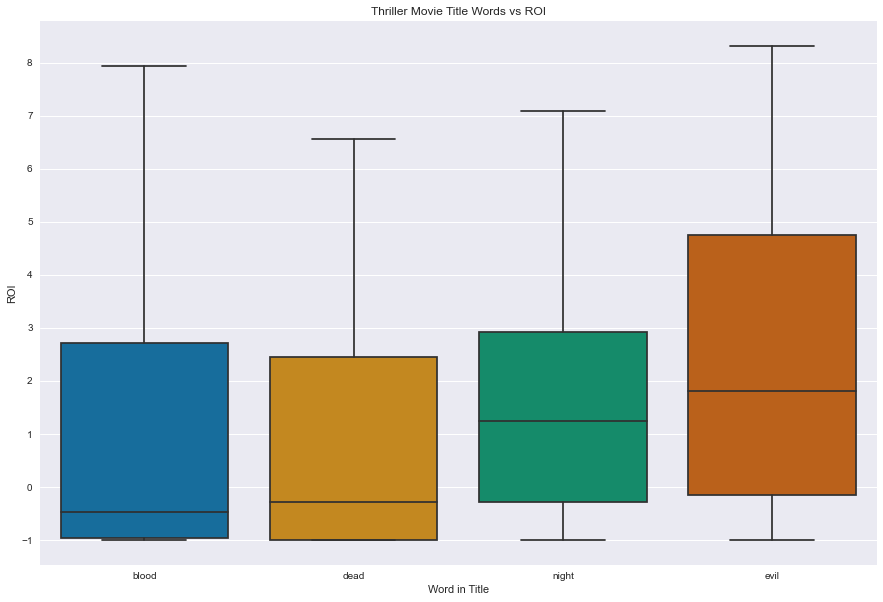

In [29]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.boxplot(x = thriller_boxplot_df['Word in Title'], y = thriller_boxplot_df['ROI'], showfliers = False)
ax.set_title("Thriller Movie Title Words vs ROI");
ax.set_yticks(np.arange(-1,9));

In [30]:
alien_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('alien')]
print('Median ROI for movies with "alien" in the title:',alien_roi['ROI'].median())

extra_mars = title_vs_gross.loc[title_vs_gross['movie'].str.contains('martian')]
mars_roi = title_vs_gross.loc[title_vs_gross['movie'].str.contains('mars')]
mars_roi = mars_roi.drop([801,1875,3406,4162,5144])
mars_roi= mars_roi.append(extra_mars)
#display(mars_roi)
print('Median ROI for movies with "mars" in the title:',mars_roi['ROI'].median())

Median ROI for movies with "alien" in the title: 1.4589819278350515
Median ROI for movies with "mars" in the title: -0.5846114166666667


In [31]:
scifi_boxplot_df = pd.concat([alien_roi,mars_roi])

scifi_boxplot_df.loc[scifi_boxplot_df['movie'].str.contains('mar'),['Word in Title']] = 'mars'
scifi_boxplot_df.loc[scifi_boxplot_df['movie'].str.contains('alien'),['Word in Title']] = 'alien'

scifi_boxplot_df

,movie,ROI,profit_margin,Word in Title
103,monsters vs aliens,1.181071,54.150960,alien
133,cowboys and aliens,0.079990,7.406526,alien
411,alien covenant,1.458982,59.332763,alien
710,avp alien vs predator,1.464907,59.430525,alien
900,alien resurrection,1.678333,62.663348,alien
1016,alien 3,1.881818,65.299685,alien
1298,aliens in the attic,0.323362,24.434877,alien
1451,aliens vs predator - requiem,2.222112,68.964459,alien
2079,how to lose friends & alienate people,-0.570306,-132.723539,alien
2867,aliens,9.783321,90.726419,alien


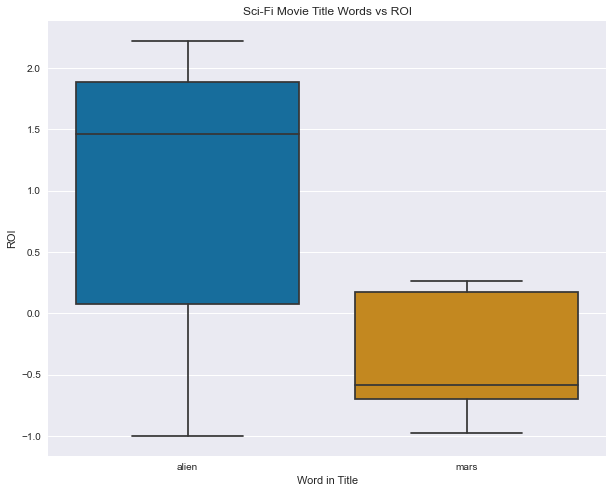

In [32]:
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.boxplot(x = scifi_boxplot_df['Word in Title'], y =scifi_boxplot_df['ROI'], showfliers = False)
ax.set_title("Sci-Fi Movie Title Words vs ROI");


## Director Analysis 

In [33]:
pd.read_sql("""
SELECT name FROM sqlite_master
WHERE type = 'table'
;
""",conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [34]:
pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [35]:
pd.read_sql("""
SELECT *
FROM directors
;
""",conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [36]:
pd.read_sql("""
SELECT *
FROM known_for
;
""",conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [37]:
pd.read_sql("""
SELECT *
FROM movie_akas
;
""",conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [38]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [39]:
pd.read_sql("""
SELECT *
FROM persons
;
""",conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [40]:
pd.read_sql("""
SELECT *
FROM principals
;
""",conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [41]:
pd.read_sql("""
SELECT *
FROM writers
;
""",conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [42]:
#Querying relevant tables 
test_sql_df = pd.read_sql("""
SELECT mb.movie_id, mb.primary_title, mb.start_year, mb.runtime_minutes, mb.genres, p.primary_name, 
pr.category, mr.averagerating, mr.numvotes

FROM movie_basics AS mb
JOIN principals AS pr
    USING(movie_id)
JOIN persons AS p
    USING(person_id)
JOIN movie_ratings as mr
    USING(movie_id)
WHERE pr.category IN ('director')
GROUP BY movie_id, person_id
;
""",conn).drop_duplicates(subset = ['movie_id'])

In [43]:
#removing duplicates
test_sql_df = test_sql_df.drop_duplicates(subset = ['primary_title','start_year'])
test_sql_df.duplicated(subset = ['primary_title','start_year']).sum()

0

In [44]:
#cleaning and reformatting data
test_sql_df['primary_title'] = test_sql_df['primary_title'].str.lower()
test_sql_df['primary_title'] = test_sql_df['primary_title'].replace([':','\.','\,',"'",'!'], '', regex = True)

In [45]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets['year'] = tn_movie_budgets['release_date'].map(lambda x: x[-4:]).astype(float)
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].str.lower()
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].replace([':','\.','\,',"'",'!'], '', regex = True)
money_columns = ['production_budget','domestic_gross','worldwide_gross']
tn_movie_budgets[money_columns] = tn_movie_budgets[money_columns].replace([',','\$'], '', regex = True).astype(float)
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets['ROI'] = tn_movie_budgets['profit'] / tn_movie_budgets['production_budget']
tn_movie_budgets['profit_margin'] = tn_movie_budgets['profit'] / tn_movie_budgets['worldwide_gross'] * 100

In [46]:
sql_budgets_merged = test_sql_df.merge(tn_movie_budgets, left_on = ['primary_title','start_year'], right_on = ['movie','year'])

In [47]:
sql_budgets_merged.sort_values(by = 'worldwide_gross', ascending = False)
sql_budgets_merged.duplicated(subset = ['primary_name','primary_title']).sum()

0

In [48]:
sql_budgets_merged['primary_name'].value_counts().head(122)

Steven Spielberg       7
Jon M. Chu             6
Clint Eastwood         6
Ridley Scott           6
Francis Lawrence       5
                      ..
Joe Johnston           3
Catherine Hardwicke    3
Louis Leterrier        3
Paul Greengrass        3
Henry Joost            3
Name: primary_name, Length: 122, dtype: int64

In [49]:
directors_atleast3_list = list(sql_budgets_merged['primary_name'].value_counts().head(122).index)
remove_list = ['David Ayer', 'Joe Johnston', 'Mike Flanagan', 'Dan Gilroy', 'Frank Coraci']
directors_atleast3_list_cleaned = [i for i in directors_atleast3_list if i not in remove_list]
directors_atleast3_df = sql_budgets_merged.loc[sql_budgets_merged['primary_name'].isin(directors_atleast3_list_cleaned)]

In [50]:
romance_directors = directors_atleast3_df.loc[directors_atleast3_df['genres'].str.contains('Romance')]
thriller_directors = directors_atleast3_df.loc[directors_atleast3_df['genres'].str.contains('Thriller') ]
scifi_directors = directors_atleast3_df.loc[directors_atleast3_df['genres'].str.contains('Sci')]

In [51]:
rom_keep = list(romance_directors['primary_name'].value_counts().loc[lambda x: x>=2].reset_index()['index'])
thri_keep = list(thriller_directors['primary_name'].value_counts().loc[lambda x: x>=2].reset_index()['index'])
sci_keep = list(scifi_directors['primary_name'].value_counts().loc[lambda x: x>=2].reset_index()['index'])

rom_dir = romance_directors.loc[romance_directors['primary_name'].isin(rom_keep)]
thri_dir = thriller_directors.loc[thriller_directors['primary_name'].isin(thri_keep)]
sci_dir = scifi_directors.loc[scifi_directors['primary_name'].isin(sci_keep)]

sci_dir['primary_name'].value_counts()

Ridley Scott         3
Anthony Russo        3
Gareth Edwards       3
Michael Bay          3
Francis Lawrence     3
Denis Villeneuve     2
Bryan Singer         2
James Mangold        2
Steve Pink           2
James DeMonaco       2
Shane Black          2
Robert Rodriguez     2
Rupert Wyatt         2
Marc Webb            2
Christopher Nolan    2
Name: primary_name, dtype: int64

In [52]:
romance_director_rois = rom_dir.groupby(['primary_name'])[['ROI']].agg('median').sort_values(by = 'ROI', ascending = False)
romance_director_rois

,ROI
primary_name,
Jake Kasdan,6.245579
Will Gluck,5.856772
Jon M. Chu,5.733147
Tim Story,5.182822
David O. Russell,4.631472
Lasse Hallström,3.520151
Woody Allen,2.849973
Jonathan Levine,2.837387
David Frankel,2.402937


In [53]:
thriller_director_rois = thri_dir.groupby(['primary_name'])[['ROI']].agg('median').sort_values(by = 'ROI', ascending = False)
thriller_director_rois

,ROI
primary_name,
Henry Joost,33.985784
Christopher Landon,20.591511
Scott Derrickson,15.087245
M. Night Shyamalan,15.000369
James Wan,14.900007
John Erick Dowdle,6.452157
Luc Besson,5.570156
Paul Greengrass,2.468069
Jaume Collet-Serra,2.403077


In [54]:
scifi_director_rois = sci_dir.groupby(['primary_name'])[['ROI']].agg('median').sort_values(by = 'ROI', ascending = False)
scifi_director_rois

,ROI
primary_name,
James DeMonaco,11.122119
Francis Lawrence,5.132601
Michael Bay,4.257329
Gareth Edwards,4.245514
Christopher Nolan,3.630346
Anthony Russo,3.560278
James Mangold,3.233758
Shane Black,2.944660
Marc Webb,2.494969


In [55]:
romance_director_rois.values[0]

array([6.24557931])

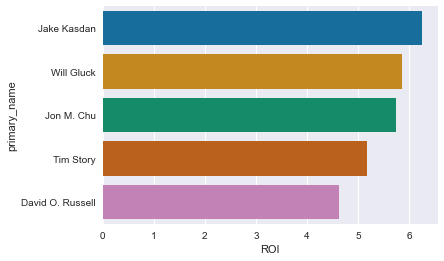

In [56]:
#Plotting Romance 
fig,ax = plt.subplots()

ax = sns.barplot( y = romance_director_rois.index[:5], x = romance_director_rois.ROI[:5], data = romance_director_rois)

Text(0.5, 0, 'Median ROI (Min 3 Films)')

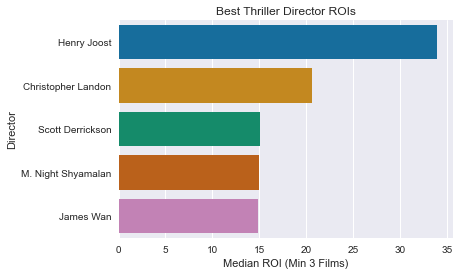

In [57]:
#Plotting Thriller
fig,ax = plt.subplots()
ax = sns.barplot( y = thriller_director_rois.index[:5], x = thriller_director_rois.ROI[:5], data = thriller_director_rois)
ax.set_title('Best Thriller Director ROIs')
ax.set_ylabel('Director')
ax.set_xlabel('Median ROI (Min 3 Films)')

Text(0.5, 0, 'Median ROI (Min 3 Films)')

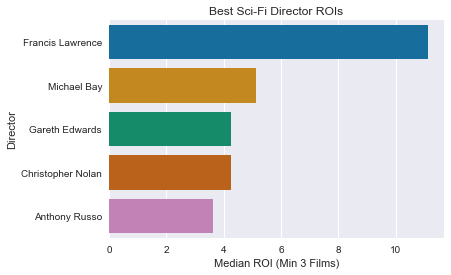

In [58]:
#Plotting Sci-Fi
fig,ax = plt.subplots()
ax = sns.barplot( y = scifi_director_rois.index[1:6], x = scifi_director_rois.ROI[:5], data = scifi_director_rois)
ax.set_title('Best Sci-Fi Director ROIs')
ax.set_ylabel('Director')
ax.set_xlabel('Median ROI (Min 3 Films)')

In [59]:
directors_atleast3_df.loc[directors_atleast3_df['primary_name'] == 'James DeMonaco']

,movie_id,primary_title,start_year,runtime_minutes,genres,primary_name,category,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,ROI,profit_margin
880,tt2184339,the purge,2013,85.0,"Horror,Thriller",James DeMonaco,director,5.7,183549,67,"Jun 7, 2013",the purge,3000000.0,64473115.0,91266581.0,2013.0,88266581.0,29.422194,96.712926
1100,tt2975578,the purge anarchy,2014,103.0,"Action,Horror,Sci-Fi",James DeMonaco,director,6.5,126203,71,"Jul 18, 2014",the purge anarchy,9000000.0,71562550.0,111534881.0,2014.0,102534881.0,11.392765,91.930775
1268,tt4094724,the purge election year,2016,108.0,"Action,Horror,Sci-Fi",James DeMonaco,director,6.0,80254,42,"Jul 1, 2016",the purge election year,10000000.0,79042440.0,118514727.0,2016.0,108514727.0,10.851473,91.562230


In [60]:
top_bot_5_dir = directors_atleast3_df.groupby(['primary_name'])[['ROI']].agg('median').sort_values(by = 'ROI', ascending = False)
top_bot_5_dir

,ROI
primary_name,
Henry Joost,27.563598
Christopher Landon,11.656013
James DeMonaco,11.392765
James Wan,10.946642
Damien Chazelle,10.808799
...,...
Pierre Morel,0.021907
Rob Cohen,0.012193
Nicolas Winding Refn,-0.063633


## Genre proof

In [61]:
sql_budgets_merged['release_date'] = pd.to_datetime(sql_budgets_merged['release_date'])
sql_budgets_merged = sql_budgets_merged.loc[sql_budgets_merged['profit'] > 0]
sql_budgets_merged.tail(35)


,movie_id,primary_title,start_year,runtime_minutes,genres,primary_name,category,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,ROI,profit_margin
1425,tt6450186,i can only imagine,2018,110.0,"Biography,Drama,Family",Jon Erwin,director,7.4,11439,90,2018-03-16,i can only imagine,7000000.0,83482352.0,85604221.0,2018.0,78604221.0,11.229174,91.822833
1426,tt6472976,five feet apart,2019,116.0,"Drama,Romance",Justin Baldoni,director,7.2,10645,91,2019-03-15,five feet apart,7000000.0,45729221.0,80504421.0,2019.0,73504421.0,10.500632,91.304825
1429,tt6499752,upgrade,2018,100.0,"Action,Sci-Fi,Thriller",Leigh Whannell,director,7.6,104978,89,2018-06-01,upgrade,3000000.0,11977130.0,16553285.0,2018.0,13553285.0,4.517762,81.876709
1430,tt6512428,indivisible,2018,119.0,"Drama,War",David G. Evans,director,5.6,812,93,2018-10-26,indivisible,2700000.0,3511417.0,3588305.0,2018.0,888305.0,0.329002,24.755560
1431,tt6513120,fighting with my family,2019,108.0,"Biography,Comedy,Drama",Stephen Merchant,director,7.2,26704,86,2019-02-14,fighting with my family,11000000.0,22958583.0,39049922.0,2019.0,28049922.0,2.549993,71.830930
1434,tt6722030,the intruder,2019,102.0,"Drama,Horror,Mystery",Deon Taylor,director,5.5,1912,72,2019-05-03,the intruder,8000000.0,35095904.0,36005871.0,2019.0,28005871.0,3.500734,77.781401
1435,tt6772950,truth or dare,2018,100.0,"Horror,Thriller",Jeff Wadlow,director,5.2,33621,91,2018-04-13,truth or dare,3500000.0,41411015.0,95127344.0,2018.0,91627344.0,26.179241,96.320721
1436,tt6781982,night school,2018,111.0,Comedy,Malcolm D. Lee,director,5.6,23501,16,2018-09-28,night school,29000000.0,77339130.0,103008792.0,2018.0,74008792.0,2.552027,71.847063
1437,tt6791096,i feel pretty,2018,110.0,"Comedy,Romance",Abby Kohn,director,5.4,39936,99,2018-04-20,i feel pretty,32000000.0,48795601.0,91553797.0,2018.0,59553797.0,1.861056,65.047872
1438,tt6802308,the 1517 to paris,2018,94.0,"Biography,Drama,Thriller",Clint Eastwood,director,5.2,21880,23,2018-02-09,the 1517 to paris,30000000.0,36276286.0,56096200.0,2018.0,26096200.0,0.869873,46.520442


In [62]:



genres_list = ['Romance','Thriller','Action','Comedy','Drama','Sci-Fi','Documentary','Animation','Fantasy','Adventure','Family','Sport','War']
genres_dict = {}
genres_dict['Genre'] = []
genres_dict['Median Profit Margin'] = []
genres_dict['Median Budget'] = []
genres_dict['Median ROI'] = []
genres_dict['Number of Films'] = []

for genre in genres_list:
    sql_budgets_merged[genre] = sql_budgets_merged['genres'].str.contains(genre)
    #display(sql_budgets_merged.groupby([genre])[['profit_margin']].agg('median').sort_values(by = 'profit_margin', ascending = False))
    
    genres_dict['Genre'].append(genre)
    genres_dict['Median Profit Margin'].append(sql_budgets_merged.groupby([genre])[['profit_margin']].agg('median').sort_values(by = 'profit_margin', ascending = False).iloc[0][0])
    genres_dict['Median Budget'].append(sql_budgets_merged.groupby([genre])[['production_budget']].agg('median').sort_values(by = 'production_budget', ascending = False).iloc[0][0])
    genres_dict['Median ROI'].append(sql_budgets_merged.groupby([genre])[['ROI']].agg('median').sort_values(by = 'ROI', ascending = False).iloc[0][0])
    genres_dict['Number of Films'].append(sql_budgets_merged['genres'].str.contains(genre).sum() )
    



print(sql_budgets_merged['profit_margin'].median())


genres_df = pd.DataFrame(genres_dict)
genres_df = genres_df.sort_values(by = 'Median Profit Margin', ascending = False)
display(genres_df)

66.86478030438123


,Genre,Median Profit Margin,Median Budget,Median ROI,Number of Films
5,Sci-Fi,71.966303,120000000.0,2.567136,105
1,Thriller,71.165513,35000000.0,2.468069,171
2,Action,68.810638,78000000.0,2.206221,336
7,Animation,68.131558,95000000.0,2.137901,95
0,Romance,67.785608,35000000.0,2.104204,136
9,Adventure,67.556816,117000000.0,2.082321,303
10,Family,67.499174,54500000.0,2.076845,72
8,Fantasy,67.482876,75000000.0,2.075303,95
3,Comedy,67.191211,32250000.0,2.047964,390
4,Drama,67.090529,50000000.0,2.038639,450


Text(0.5, 1.0, 'Profit Margin vs Genre')

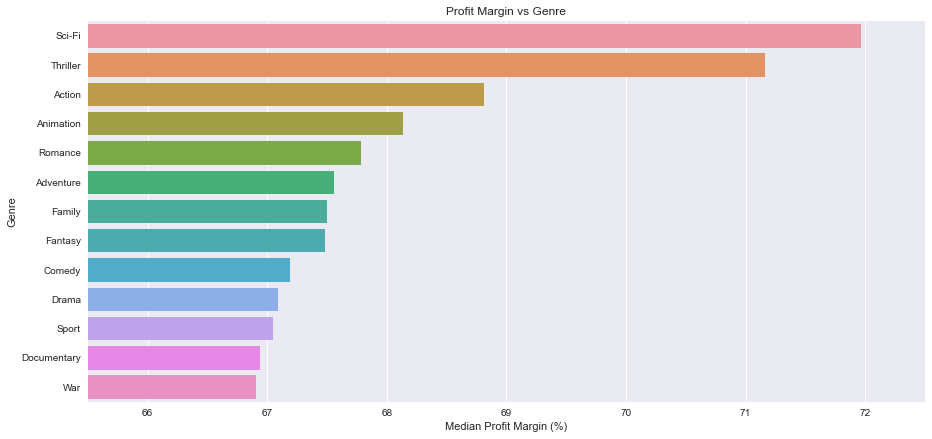

In [63]:
fig,ax = plt.subplots(figsize = (15,7))

ax = sns.barplot(y = 'Genre' , x = 'Median Profit Margin', data = genres_df)
ax.set_xlim(65.5,72.5)
ax.set_xlabel('Median Profit Margin (%)')
ax.set_title('Profit Margin vs Genre')
#ax.axvline(67.36478030438123, color = 'black')

In [64]:
genres_df

,Genre,Median Profit Margin,Median Budget,Median ROI,Number of Films
5,Sci-Fi,71.966303,120000000.0,2.567136,105
1,Thriller,71.165513,35000000.0,2.468069,171
2,Action,68.810638,78000000.0,2.206221,336
7,Animation,68.131558,95000000.0,2.137901,95
0,Romance,67.785608,35000000.0,2.104204,136
9,Adventure,67.556816,117000000.0,2.082321,303
10,Family,67.499174,54500000.0,2.076845,72
8,Fantasy,67.482876,75000000.0,2.075303,95
3,Comedy,67.191211,32250000.0,2.047964,390
4,Drama,67.090529,50000000.0,2.038639,450


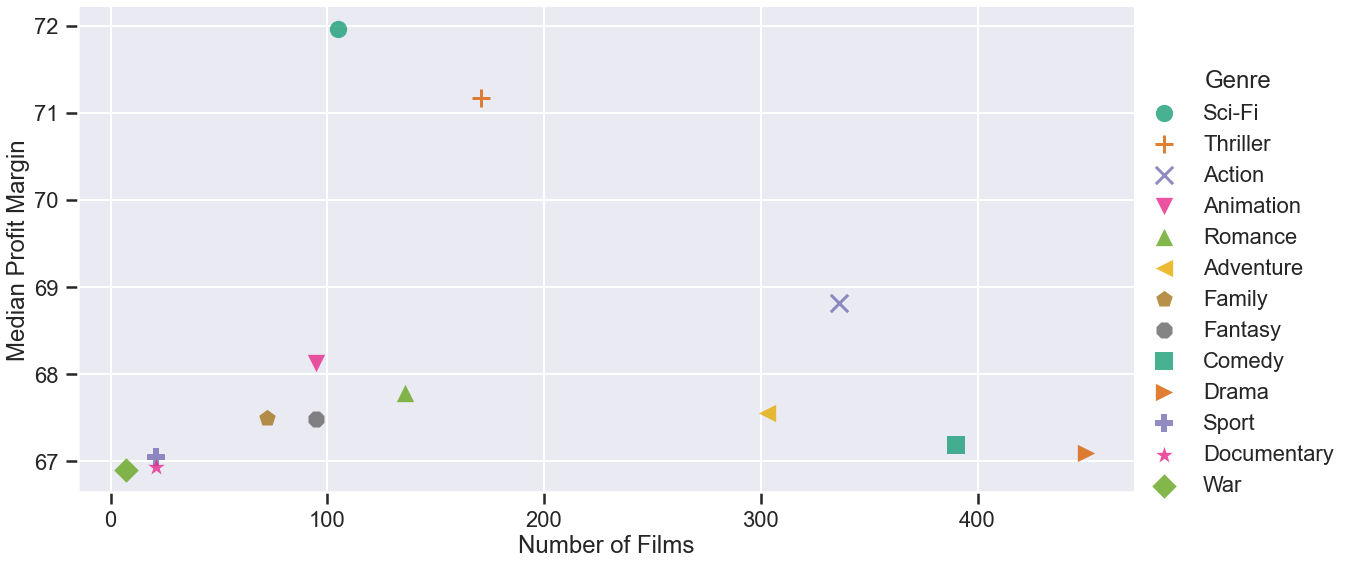

In [65]:
sns.set_context("poster")
#fig,ax = plt.subplots(figsize = (15,7))

#ax = sns.scatterplot(y = 'Median Profit Margin' , x = 'Number of Films', data = genres_df, hue = genres_df['Genre'], markers=[".","+","x","v",'^','<','>','8','s','p','P','*','D'])
sns.lmplot(data = genres_df, x = 'Number of Films', y = 'Median Profit Margin', hue = 'Genre', palette = 'Dark2',
       fit_reg = False, scatter_kws={"s": 300}, height=8, aspect=2, markers=["o","+","x",'v','^','<','p','8','s','>','P','*','D']);

# ROI / PROFIT MARGIN INVESTING


In [66]:
# money_columns = ['production_budget','domestic_gross','worldwide_gross']
# tn_movie_budgets[money_columns] = tn_movie_budgets[money_columns].replace([',','\$'], '', regex = True).astype(int)
# tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
# tn_movie_budgets['ROI'] = tn_movie_budgets['profit'] / tn_movie_budgets['production_budget']
# tn_movie_budgets['profit_margin'] = tn_movie_budgets['profit'] / tn_movie_budgets['worldwide_gross'] * 100
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].str.lower()
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].replace([':','\.','\,',"'",'!'], '', regex = True)
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])


In [67]:
tn_movie_budgets['release_date'].min()

Timestamp('1915-02-08 00:00:00')

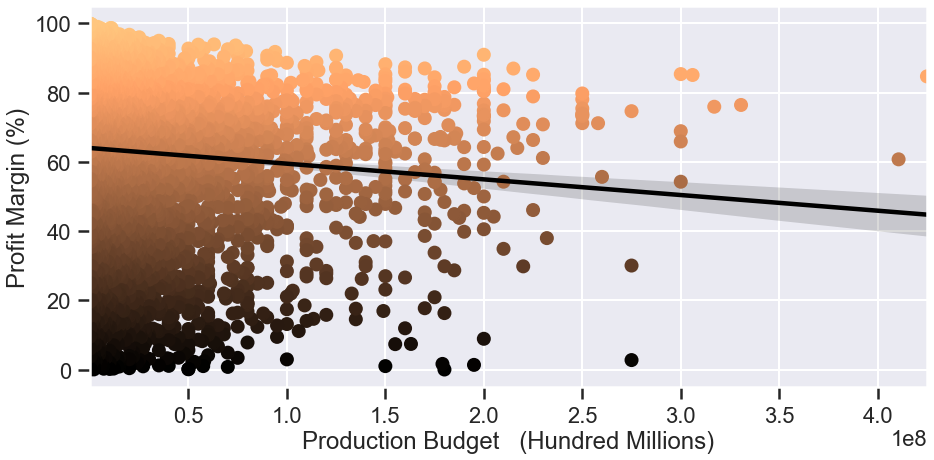

In [68]:
fig, ax = plt.subplots(figsize = (15,7))
profitable_movies = tn_movie_budgets.loc[tn_movie_budgets['profit_margin'] >= 0]


ax = sns.regplot(x ='production_budget', y = 'profit_margin', data = profitable_movies, scatter = False, color = 'black');
ax.scatter(profitable_movies['production_budget'], profitable_movies['profit_margin'], c = profitable_movies["profit_margin"],  cmap="copper");

#ax.hlines(y=60.4, xmin=0, xmax=4e8, linewidth=2, color='cyan')
#ax.vlines(x=0.9e8, ymin=0, ymax=100, linewidth=2, color='cyan')
ax.set_ylabel('Profit Margin (%)');
ax.set_xlabel('Production Budget   (Hundred Millions)');


#current_values = plt.gca().get_xticks()
#plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

#ax.get_xaxis().get_major_formatter().set_useOffset(False)
#ax.set_xticks(ticks = [50e6,100e6,150e6,200e6,250e6,300e6,350e6,400e6,450e6])

In [69]:
'''fig, ax = plt.subplots(figsize = (15,7))
profitable_movies_roi = tn_movie_budgets.loc[tn_movie_budgets['ROI'].between(0, 5)]
display(profitable_movies_roi)
ax = sns.regplot(x ='production_budget', y = 'ROI', data = profitable_movies_roi, scatter = False, color = 'grey')
ax.scatter(profitable_movies_roi['production_budget'], profitable_movies_roi['ROI'], c = profitable_movies_roi["ROI"],  cmap="seismic")
'''

'fig, ax = plt.subplots(figsize = (15,7))\nprofitable_movies_roi = tn_movie_budgets.loc[tn_movie_budgets[\'ROI\'].between(0, 5)]\ndisplay(profitable_movies_roi)\nax = sns.regplot(x =\'production_budget\', y = \'ROI\', data = profitable_movies_roi, scatter = False, color = \'grey\')\nax.scatter(profitable_movies_roi[\'production_budget\'], profitable_movies_roi[\'ROI\'], c = profitable_movies_roi["ROI"],  cmap="seismic")\n'

In [70]:
rtcurrent = pd.read_csv('zippedData/rotten_tomatoes_movies.csv')
rtcurrent['original_release_date'] = pd.to_datetime(rtcurrent['original_release_date'])
rtcurrent['movie_title'] = rtcurrent['movie_title'].str.lower()
rtcurrent['movie_title'] = rtcurrent['movie_title'].replace([':','\.','\,',"'",'!'], '', regex = True)
rtcurrent

,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,production_company,tomatometer_status
0,percy jackson & the olympians the lightning thief,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,20th Century Fox,Rotten
1,please give,Kate (Catherine Keener) and her husband Alex (...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,Sony Pictures Classics,Certified-Fresh
2,10,"A successful, middle-aged Hollywood songwriter...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,Waner Bros.,Fresh
3,12 angry men (twelve angry men),Following the closing arguments in a murder tr...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,Criterion Collection,Certified-Fresh
4,20000 leagues under the sea,"In 1866, Professor Pierre M. Aronnax (Paul Luk...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,Disney,Fresh
...,...,...,...,...,...,...,...,...,...,...
17707,zoot suit,Mexican-American gangster Henry Reyna (Daniel ...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,MCA Universal Home Video,Rotten
17708,zootopia,From the largest elephant to the smallest shre...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,Walt Disney Animation Studios,Certified-Fresh
17709,zorba the greek,Traveling to inspect an abandoned mine his fat...,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,Fox,Fresh
17710,zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,Paramount Pictures,Fresh


In [71]:
genre_budg = tn_movie_budgets.merge(rtcurrent, left_on = ['movie','release_date'], right_on = ['movie_title','original_release_date'])

In [72]:
genre_budg

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,ROI,profit_margin,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,production_company,tomatometer_status
0,1,2009-12-18,avatar,425000000.0,760507625.0,2.776345e+09,2009.0,2.351345e+09,5.532577,84.692106,avatar,On the lush alien world of Pandora live the Na...,PG-13,"Action & Adventure, Comedy, Mystery & Suspense...",James Cameron,James Cameron,"Zoe Saldana, Sam Worthington, Sigourney Weaver...",2009-12-18,20th Century Fox,Certified-Fresh
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000.0,241063875.0,1.045664e+09,2011.0,6.350639e+08,1.546673,60.733080,pirates of the caribbean on stranger tides,The checkered past of Capt. Jack Sparrow (John...,PG-13,"Action & Adventure, Comedy, Science Fiction & ...","Dariusz Wolski, Rob Marshall","Rob Marshall, Terry Rossio, Ted Elliott","Johnny Depp, Penelope Cruz, Ian McShane, Geoff...",2011-05-20,Walt Disney Pictures,Rotten
2,3,2019-06-07,dark phoenix,350000000.0,42762350.0,1.497624e+08,2019.0,-2.002376e+08,-0.572108,-133.703598,dark phoenix,The X-Men face their most formidable and power...,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Simon Kinberg,Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...",2019-06-07,20th Century Fox,Rotten
3,4,2015-05-01,avengers age of ultron,330600000.0,459005868.0,1.403014e+09,2015.0,1.072414e+09,3.243841,76.436443,avengers age of ultron,When Tony Stark (Robert Downey Jr.) jump-start...,PG-13,"Action & Adventure, Science Fiction & Fantasy",Joss Whedon,"Stan Lee, Jack Kirby, Joss Whedon","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-05-01,Walt Disney Pictures,Certified-Fresh
4,7,2018-04-27,avengers infinity war,300000000.0,678815482.0,2.048134e+09,2018.0,1.748134e+09,5.827114,85.352522,avengers infinity war,"Iron Man, Thor, the Hulk and the rest of the A...",PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2018-04-27,Walt Disney Pictures,Certified-Fresh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,50,2003-06-13,manito,25000.0,0.0,0.000000e+00,2003.0,-2.500000e+04,-1.000000,-inf,manito,Set and vibrantly photographed in the Washingt...,NR,Drama,Eric Eason,Eric Eason,"Franky G, Leo Minaya, Leo Manaya, Manuel Cabra...",2003-06-13,Film Movement,Fresh
3736,61,2010-04-02,breaking upwards,15000.0,115592.0,1.155920e+05,2010.0,1.005920e+05,6.706133,87.023323,breaking upwards,"A young couple (Daryl Wein, Zoe Lister-Jones) ...",NR,"Drama, Romance",Daryl Wein,"Peter Duchan, Zoe Lister-Jones, Daryl Wein","Daryl Wein, Zoe Lister-Jones, Julie White, Oli...",2010-04-02,IFC Films,Fresh
3737,74,1993-02-26,el mariachi,7000.0,2040920.0,2.041928e+06,1993.0,2.034928e+06,290.704000,99.657187,el mariachi,El Mariachi (Carlos Gallardo) is a traveling g...,R,"Action & Adventure, Art House & International,...",Robert Rodriguez,"Robert Rodriguez, Carlos Gallardo","Carlos Gallardo, Consuelo Gómez, Reinol Martin...",1993-02-26,Sony Pictures Home Entertainment,Fresh
3738,75,2004-10-08,primer,7000.0,424760.0,8.419260e+05,2004.0,8.349260e+05,119.275143,99.168573,primer,Intellectual engineers Aaron (Shane Carruth) a...,PG-13,"Drama, Mystery & Suspense, Science Fiction & F...",Shane Carruth,Shane Carruth,"Shane Carruth, David Sullivan, Casey Gooden, A...",2004-10-08,ThinkFilm,Fresh


In [73]:
genre_budg
genre_budg['production_company'] = genre_budg['production_company'].str.lower()
genre_budg['production_company']  = genre_budg['production_company'].replace([':','\.','\,',"'",'!'], '', regex = True)

genre_budg = genre_budg.dropna(subset = ['production_company'])



genre_budg.loc[genre_budg['production_company'].str.contains('century fox'),['production_company'] ] = '20th Century Fox'
genre_budg.loc[genre_budg['production_company'].str.contains('warner'),['production_company'] ] = 'Warner Bros'
genre_budg.loc[genre_budg['production_company'].str.contains('sony'),['production_company'] ] = 'Sony Sictures'
genre_budg.loc[genre_budg['production_company'].str.contains('paramount'),['production_company'] ] = 'Paramount'
genre_budg.loc[genre_budg['production_company'].str.contains('universal'),['production_company'] ] = 'Universal'
genre_budg.loc[genre_budg['production_company'].str.contains('columbia'),['production_company'] ] = 'Columbia Pictures'
genre_budg.loc[genre_budg['production_company'].str.contains('new line'),['production_company'] ] = 'New Line Cinema'
genre_budg.loc[genre_budg['production_company'].str.contains('walt '),['production_company'] ] = 'Walt Disney'
genre_budg.loc[genre_budg['production_company'].str.contains('miramax'),['production_company'] ] = 'Miramax'
genre_budg.loc[genre_budg['production_company'].str.contains('mgm'),['production_company'] ] = 'MGM'
genre_budg.loc[genre_budg['production_company'].str.contains('lionsgate'),['production_company'] ] = 'Lionsgate'
genre_budg.loc[genre_budg['production_company'].str.contains('focus'),['production_company'] ] = 'Focus Features'




C:\Users\paperspace\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [74]:
top_10_studios = list(genre_budg['production_company'].value_counts().head(10).index)
top_10_studios

top_10_df = genre_budg.loc[genre_budg['production_company'].isin(top_10_studios)]
top_10_df = top_10_df.loc[genre_budg['profit'] > 10 ]

top_10_df 


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,ROI,profit_margin,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,production_company,tomatometer_status
0,1,2009-12-18,avatar,425000000.0,760507625.0,2.776345e+09,2009.0,2.351345e+09,5.532577,84.692106,avatar,On the lush alien world of Pandora live the Na...,PG-13,"Action & Adventure, Comedy, Mystery & Suspense...",James Cameron,James Cameron,"Zoe Saldana, Sam Worthington, Sigourney Weaver...",2009-12-18,20th Century Fox,Certified-Fresh
5,9,2017-11-17,justice league,300000000.0,229024295.0,6.559452e+08,2017.0,3.559452e+08,1.186484,54.264473,justice league,Fueled by his restored faith in humanity and i...,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Zack Snyder,"Chris Terrio, Joss Whedon","Ben Affleck, Henry Cavill, Amy Adams, Gal Gado...",2017-11-17,Warner Bros,Rotten
6,10,2015-11-06,spectre,300000000.0,200074175.0,8.796209e+08,2015.0,5.796209e+08,1.932070,65.894399,spectre,A cryptic message from the past leads James Bo...,PG-13,Action & Adventure,Sam Mendes,"Ian Fleming (II), John Logan, Neal Purvis, Rob...","Daniel Craig, Christoph Waltz, Naomie Harris, ...",2015-11-06,Sony Sictures,Fresh
7,11,2012-07-20,the dark knight rises,275000000.0,448139099.0,1.084439e+09,2012.0,8.094391e+08,2.943415,74.641268,the dark knight rises,It has been eight years since Batman (Christia...,PG-13,"Action & Adventure, Drama, Mystery & Suspense",Christopher Nolan,"Christopher Nolan, Jonathan Nolan, Bob Kane","Christian Bale, Michael Caine, Gary Oldman, An...",2012-07-20,Warner Bros,Certified-Fresh
11,16,2007-05-04,spider-man 3,258000000.0,336530303.0,8.948602e+08,2007.0,6.368602e+08,2.468451,71.168682,spider-man 3,Peter Parker (Tobey Maguire) and M.J. (Kirsten...,PG-13,"Action & Adventure, Mystery & Suspense, Scienc...",Sam Raimi,"Alvin Sargent, Ivan Raimi, Sam Raimi, Stan Lee","Tobey Maguire, Kirsten Dunst, James Franco, Th...",2007-05-04,Sony Sictures,Fresh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,85,1998-10-09,the mighty,100000.0,2652246.0,6.121582e+06,1998.0,6.021582e+06,60.215820,98.366435,the mighty,Kevin Dillon (Kieran Culkin) suffers from a di...,PG-13,Drama,Peter Chelsom,Charles Leavitt,"Sharon Stone, Gena Rowlands, Harry Dean Stanto...",1998-10-09,Miramax,Certified-Fresh
3725,16,1995-08-09,the brothers mcmullen,50000.0,10426506.0,1.042651e+07,1995.0,1.037651e+07,207.530120,99.520453,the brothers mcmullen,"When you're a good Irish Catholic, you choose ...",R,"Comedy, Drama, Romance",Edward Burns,NaN,"Jack Mulcahy, Mike McGlone, Edward Burns, Conn...",1995-08-09,20th Century Fox,Fresh
3733,43,1994-10-19,clerks,27000.0,3073428.0,3.894240e+06,1994.0,3.867240e+06,143.231111,99.306668,clerks,Dante (Brian O'Halloran) is called in to cover...,R,"Comedy, Cult Movies, Drama",NaN,NaN,"Brian O'Halloran, Jeff Anderson, Marilyn Ghigl...",1994-10-19,Miramax,Certified-Fresh
3734,47,1997-08-01,in the company of men,25000.0,2883661.0,2.883661e+06,1997.0,2.858661e+06,114.346440,99.133046,in the company of men,Chad (Aaron Eckhart) and Howard (Matt Malloy) ...,R,"Art House & International, Comedy, Drama",Neil LaBute,Neil LaBute,"Aaron Eckhart, Stacy Edwards, Matt Malloy, Mic...",1997-08-01,Sony Sictures,Certified-Fresh


In [75]:
#display(top_10_df.groupby(['production_company'])['worldwide_gross'].nlargest(10))

top_10_profit_margins = top_10_df.groupby(['production_company'])[['profit_margin']].mean().sort_values(by = 'profit_margin', ascending = False)

top_10_profit_margins.rename(index = {'production_company': 'Production Company'}, columns = {'profit_margin' : 'Median Profit Margin'}, inplace = True)

top_10_profit_margins.index.names = ['Production Company']

display(top_10_profit_margins)

np.median(top_10_profit_margins.values)

,Median Profit Margin
Production Company,
20th Century Fox,63.857508
Universal,63.252301
Lionsgate,61.577909
Miramax,61.569841
Sony Sictures,61.158969
Paramount,60.630602
MGM,60.008739
New Line Cinema,58.419637
Warner Bros,57.205628


60.89478514142517